## Import Package

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import os
import plotFunc as pf

import multiprocessing
from multiprocessing import Pool

## Define Constant

In [2]:
DX = DY = 2
NX = NY = int(90 / DX + 2- 2)
DT = 360

## Make Directory

In [16]:
os.makedirs("../graphs/grids")
os.makedirs("../graphs/h/curvilinear")
os.makedirs("../graphs/h/sphere")

## Plot Function

#### Function for plot grids

In [4]:
def Plotgrids(val, left, right, split, title, saveplace):
    fig = plt.figure(figsize=(18,10))
    ax5 = fig.add_subplot(3,4,2)
    ax4 = fig.add_subplot(3,4,5)
    ax1 = fig.add_subplot(3,4,6)
    ax2 = fig.add_subplot(3,4,7)
    ax3 = fig.add_subplot(3,4,8)
    ax6 = fig.add_subplot(3,4,10)

    cmap = cm.twilight_shifted

    cs1 = ax1.contourf(val[0], levels=np.linspace(left, right, split), cmap=cmap)
    ax2.contourf(val[1], levels=np.linspace(left, right, split), cmap=cmap)
    ax3.contourf(val[2], levels=np.linspace(left, right, split), cmap=cmap)
    ax4.contourf(val[3], levels=np.linspace(left, right, split), cmap=cmap)
    ax5.contourf(val[4], levels=np.linspace(left, right, split), cmap=cmap)
    ax6.contourf(val[5], levels=np.linspace(left, right, split), cmap=cmap)
    cb_ax1 = fig.add_axes([0.9235, 0.1, 0.015, 0.78])
    fig.colorbar(cs1, cax=cb_ax1, ticks=np.linspace(left, right, split))

    ax5.set_title(title, fontsize=14)
    plt.savefig(saveplace, dpi=300)
    plt.close()
    return

## Load and Plot grids-related Data

In [6]:
x, y = np.loadtxt("../outputs/grids/x.txt").reshape(6, NX, NY), np.loadtxt("../outputs/grids/y.txt").reshape(6, NX, NY)
lon, lat = np.loadtxt("../outputs/grids/lon.txt").reshape(6, NX, NY), np.loadtxt("../outputs/grids/lat.txt").reshape(6, NX, NY)

In [7]:
Plotgrids(lat * 180 / np.pi, -90, 90, 11, "Latitude On Cube", "../graphs/grids/latitudeOnCube.png")
# lon_mod = np.where(lon < 0, lon + 2*np.pi, lon)
Plotgrids(lon * 180 / np.pi, 0, 360, 25, "Longitude On Cube", "../graphs/grids/longitudeOnCube.png")
Plotgrids(x, np.min(x), np.max(x), 11, "x On Cube", "../graphs/grids/xOnCube.png")
Plotgrids(y, np.min(y), np.max(y), 11, "y On Cube", "../graphs/grids/yOnCube.png")

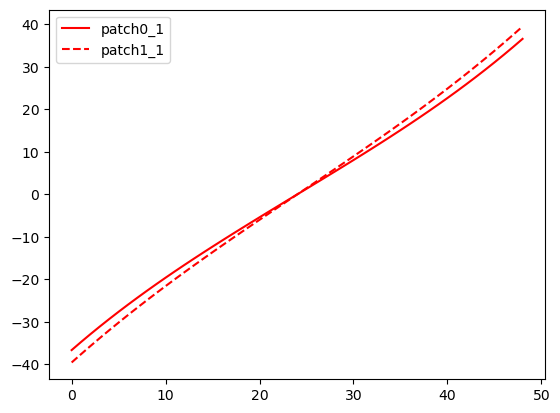

In [69]:
# patch0 R
plt.plot(lat[0, :, NY-1] * 180 / np.pi, color="r")
plt.plot(lat[1, :, 3] * 180 / np.pi, color='r', ls='--')
# plt.plot(lat[0, :, NY-2] * 180 / np.pi, color='g')
# plt.plot(lat[1, :, 2] * 180 / np.pi, color='g', ls='--')
plt.legend(['patch0_1', 'patch1_1', 'patch0_2', 'patch1_2'])
plt.show()

# patch1

In [32]:
print((lon[4, :, 0] * 180 / np.pi))
print((lon[3, NX-4, :] * 180 / np.pi))


[315.00016365 312.99653024 311.00722077 309.03280821 307.07214664
 305.12523605 303.19207645 301.27152192 299.36357246 297.46765512
 295.58319693 293.70905198 291.84522027 289.99055589 288.14505883
 286.30758318 284.47698303 282.65268541 280.83469033 279.0212789
 277.21187819 275.40591522 273.60281704 271.80086477 270.00005842
 268.19925207 266.3972998  264.59362866 262.78766569 260.97883794
 259.16542651 257.34685847 255.52313381 253.69253365 251.85505801
 250.00956095 248.15489656 246.29106486 244.41691991 242.53246172
 240.63654438 238.72859492 236.80804039 234.87488079 232.9279702
 230.96730863 228.99289606 227.0035866  224.99995319]
[221.99994617 224.00014184 225.99976454 227.99996021 230.00015587
 231.99977857 233.99997424 236.0001699  237.9997926  239.99998827
 242.00018393 243.99980663 246.0000023  248.00019796 249.99982067
 252.00001633 254.00021199 255.9998347  258.00003036 260.00022602
 261.99984873 264.00004439 266.00024005 267.99986276 270.00005842
 272.00025408 273.999876

In [82]:
count = NX//2 - 1
for idx in range(NX//2-1, -1, -1):
    B =  lat[0, idx, NX-1]
    A1, A2 = lat[1, idx+1, 3], lat[1, idx, 3]

    if ((A1-B) * (B-A2) > 0):
        print(f"A1: {A1*180/np.pi}, B: {B*180/np.pi}, A2: {A2*180/np.pi}")
    else:
        while (~((A1-B) * (B-A2) > 0)):
            tmp = idx+1
            A1, A2 = lat[1, tmp+1, 3], lat[1, tmp, 3]
        print(f"A1: {A1*180/np.pi}, B: {B*180/np.pi}, A2: {A2*180/np.pi}")


A1: 0.0, B: -1.338561189718483, A2: -1.4865619177787261
A1: -1.4865619177787261, B: -2.6789271964916286, A2: -2.9747395765397213
A1: -2.9747395765397213, B: -4.022902837374097, A2: -4.4661716355770595
A1: -4.4661716355770595, B: -5.372304388576456, A2: -5.962485295028912
A1: -5.962485295028912, B: -6.728988233354928, A2: -7.465296295877548
A1: -7.465296295877548, B: -8.094805025387783, A2: -8.976300593196555
A1: -8.976300593196555, B: -9.471622607087152, A2: -10.4971024688123
A1: -10.4971024688123, B: -10.861331739176965, A2: -12.029420796110172
A1: -12.029420796110172, B: -12.26599506971969, A2: -13.574917152696054
A1: -13.574917152696054, B: -13.687560655218775, A2: -15.135367707734853
A1: -13.574917152696054, B: -15.128091143736693, A2: -15.135367707734853
A1: -15.135367707734853, B: -16.58964918333591, A2: -16.712376743052932
A1: -16.712376743052932, B: -18.074469309417438, A2: -18.307777723594707
A1: -18.307777723594707, B: -19.58467146582326, A2: -19.92334681852509
A1: -19.923346

## Plot h/wind

In [ ]:
if __name__ == '__main__':
    nProc = multiprocessing.cpu_count()
    with Pool(nProc) as p:
        results = [p.apply_async(pf.plotOnCubeMul, (t, )) for t in range(0, 1000, 10)]
        final = [result.get() for result in results]

In [ ]:
if __name__ == '__main__':
    nProc = multiprocessing.cpu_count()
    with Pool(nProc) as p:
        results = [p.apply_async(pf.plotOnCubeWindMul, (t, )) for t in range(0, 100, 10)]
        final = [result.get() for result in results]

## Wind Plot

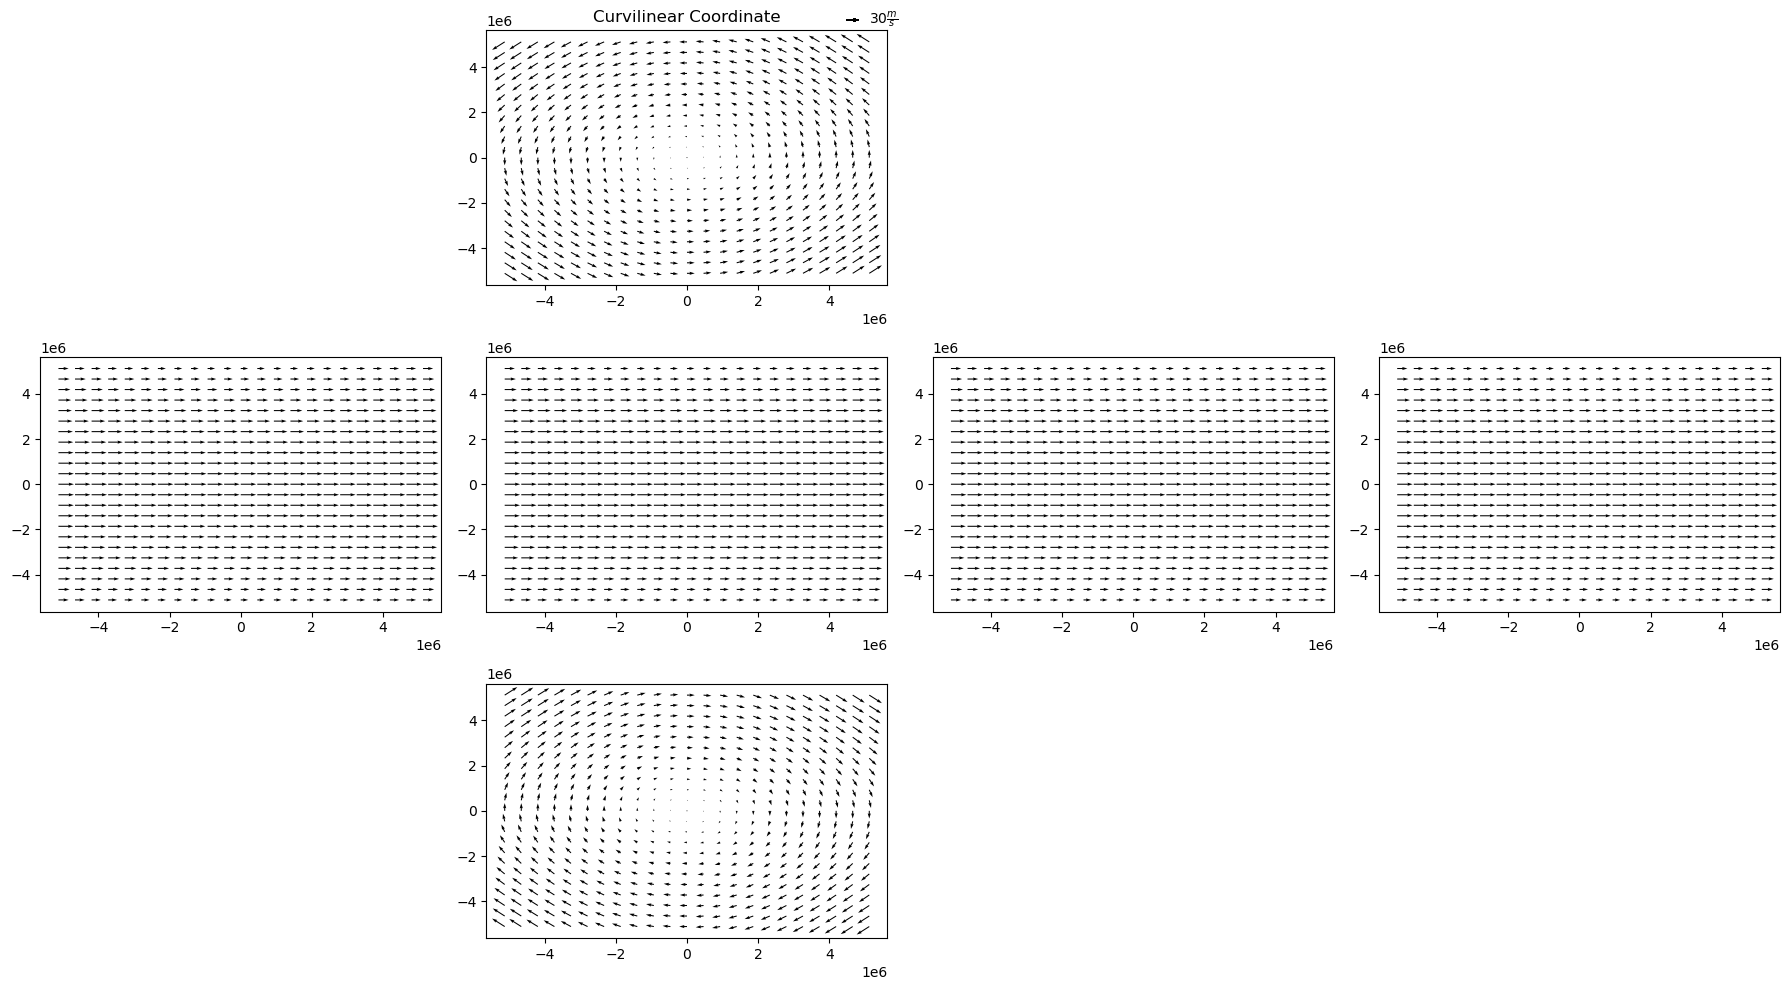

In [10]:
# x/y
NX = NY = 45
u = np.loadtxt("../outputs/u/u_0.txt").reshape(6, NX, NY)
v = np.loadtxt("../outputs/v/v_0.txt").reshape(6, NX, NY)


fig = plt.figure(figsize=(18, 10))
ax5 = fig.add_subplot(342)
ax4 = fig.add_subplot(345)
ax1 = fig.add_subplot(346)
ax2 = fig.add_subplot(347)
ax3 = fig.add_subplot(348)
ax6 = fig.add_subplot(3,4,10)

ax1.quiver(x[0][::2, ::2], y[0][::2, ::2], u[0][::2, ::2], v[0][::2, ::2], angles='xy', units="width", scale=1000)
ax2.quiver(x[1][::2, ::2], y[1][::2, ::2], u[1][::2, ::2], v[1][::2, ::2], angles='xy', units="width", scale=1000)
ax3.quiver(x[2][::2, ::2], y[2][::2, ::2], u[2][::2, ::2], v[2][::2, ::2], angles='xy', units="width", scale=1000)
ax4.quiver(x[3][::2, ::2], y[3][::2, ::2], u[3][::2, ::2], v[3][::2, ::2], angles='xy', units="width", scale=1000)
Q = ax5.quiver(x[4][::2, ::2], y[4][::2, ::2], u[4][::2, ::2], v[4][::2, ::2], angles='xy', units="width", scale=1000)
ax6.quiver(x[5][::2, ::2], y[5][::2, ::2], u[5][::2, ::2], v[5][::2, ::2], angles='xy', units="width", scale=1000)
qk = plt.quiverkey(Q, 0.48, 0.975, 30, r'$30 \frac{m}{s}$', labelpos='E', coordinates='figure')
ax5.set_title("Curvilinear Coordinate")
plt.tight_layout()
# plt.savefig("../graphs/wind/curvilinear.png", dpi=150)
plt.show()

In [ ]:
NX = NY = 45
u = np.loadtxt("../outputs/u_lon_lat/u_lon_lat_0.txt").reshape(6, NX, NY)
v = np.loadtxt("../outputs/v_lon_lat/v_lon_lat_0.txt").reshape(6, NX, NY)
lon = np.loadtxt("../outputs/grid/lon.txt").reshape(6, NX, NY) * 180. / np.pi
lat = np.loadtxt("../outputs/grid/lat.txt").reshape(6, NX, NY) * 180. / np.pi

plt.figure(figsize=(18, 12))
plt.title("Spherical Coordinate")
size = 2
plt.quiver(lon[0][::size, ::size], lat[0][::size, ::size], u[0][::size, ::size], v[0][::size, ::size], scale=1500)
plt.quiver(lon[1][::size, ::size], lat[1][::size, ::size], u[1][::size, ::size], v[1][::size, ::size], scale=1500)
plt.quiver(lon[2, 0:NX//2, :][::size, ::size], lat[2, 0:NX//2, :][::size, ::size], u[2, 0:NX//2, :][::size, ::size], v[2, 0:NX//2, :][::size, ::size], scale=1500)
plt.quiver(lon[2, NX//2:, :][::size, ::size]-360, lat[2, NX//2:, :][::size, ::size], u[2, NX//2:, :][::size, ::size], v[2, NX//2:, :][::size, ::size], scale=1500)
plt.quiver(lon[3][::size, ::size]-360, lat[3][::size, ::size], u[3][::size, ::size], v[3][::size, ::size], scale=1500)
plt.quiver(lon[4][::size, ::size], lat[4][::size, ::size], u[4][::size, ::size], v[4][::size, ::size], scale=1500)
Q = plt.quiver(lon[5][::size, ::size], lat[5][::size, ::size], u[5][::size, ::size], v[5][::size, ::size], scale=1500)
qk = plt.quiverkey(Q, 0.83, 0.89, 40, r'$40 \frac{m}{s}$', labelpos='E', coordinates='figure')
# plt.savefig("../graphs/wind/spherical.png", dpi=150)
plt.show()